In [79]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True)

Using cache found in /Users/erbao/.cache/torch/hub/pytorch_vision_v0.10.0
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /Users/erbao/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100.0%


In [74]:
# %pip install OpenEXR
import util
import os
import matplotlib.pyplot as plt

In [77]:
input_dir = "../Dataset/LavalIndoor/crop/"
nms = os.listdir(input_dir)
handle = util.PanoramaHandler()
tone = util.TonemapHDR()

torch.Size([3, 224, 224])


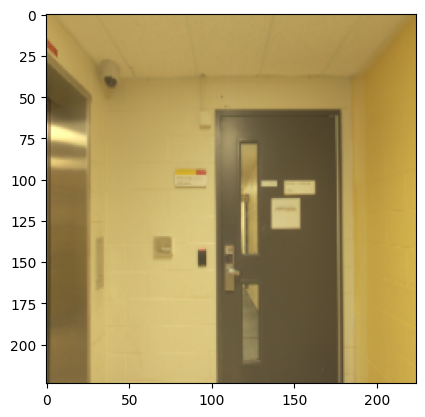

torch.Size([1, 1000])
torch.Size([3, 224, 224])


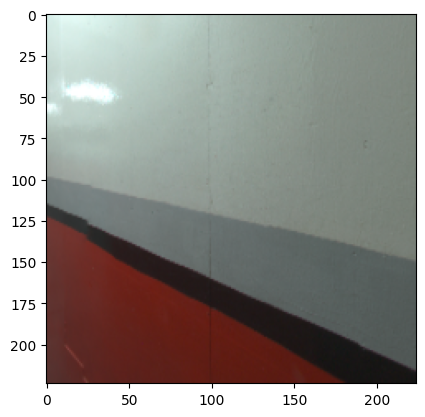

torch.Size([1, 1000])
torch.Size([3, 224, 224])


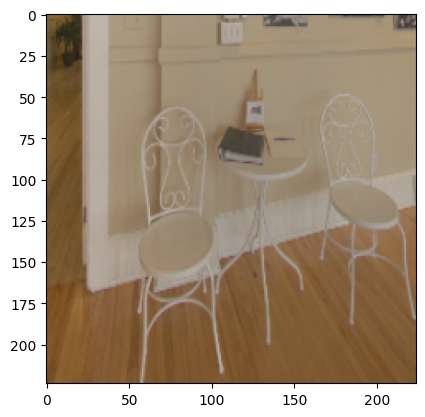

torch.Size([1, 1000])
torch.Size([3, 224, 224])


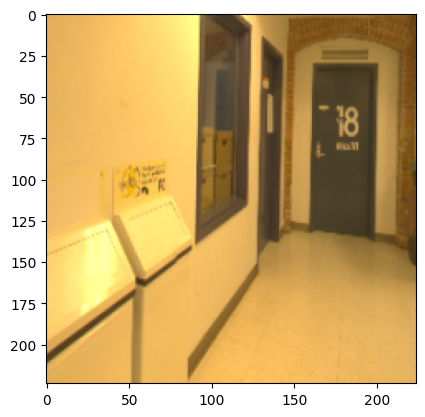

torch.Size([1, 1000])
torch.Size([3, 224, 224])


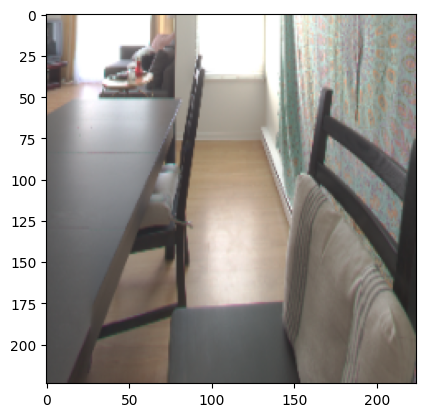

torch.Size([1, 1000])
torch.Size([3, 224, 224])


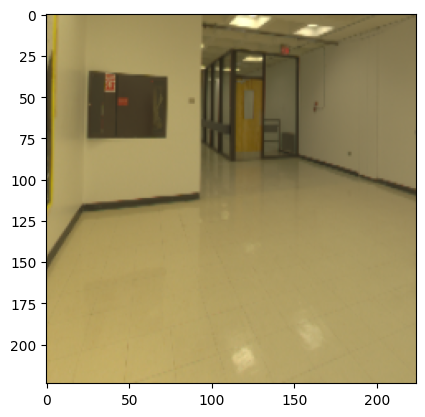

torch.Size([1, 1000])
torch.Size([3, 224, 224])


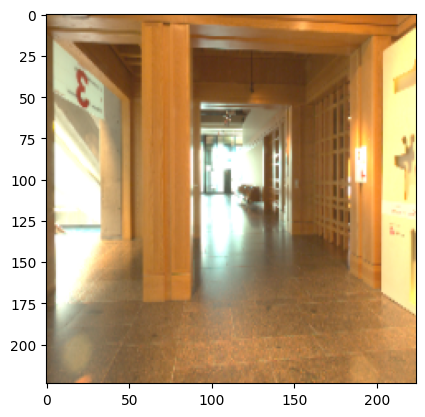

torch.Size([1, 1000])
torch.Size([3, 224, 224])


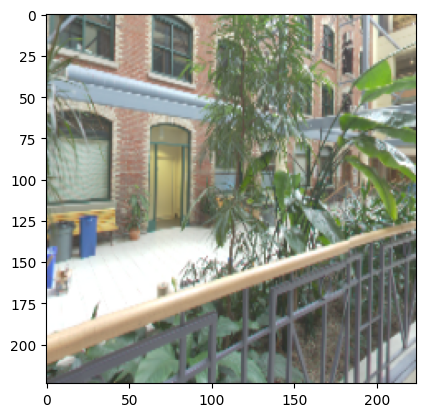

torch.Size([1, 1000])
torch.Size([3, 224, 224])


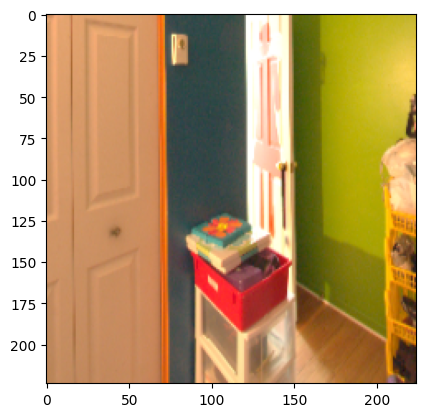

torch.Size([1, 1000])
torch.Size([3, 224, 224])


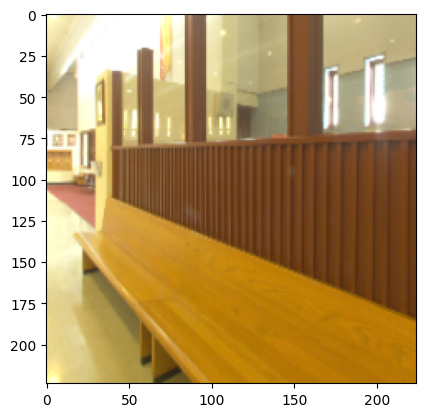

torch.Size([1, 1000])


In [76]:
from torchvision import transforms

i = 0
for nm in nms:
    if nm.endswith('.exr') and i < 10:
        path = input_dir + nm
        exr = handle.read_hdr(path)
        img = tone(exr, True)[0]
        img = torch.from_numpy(img) # (H, W, C)
        img = torch.movedim(img, (0, 1, 2), (1, 2, 0)) # (C, H, W)
        preprocess = transforms.Compose([
            transforms.Resize((224, 224)),
            # transforms.CenterCrop(224),
        ])
        img = preprocess(img)
        print(img.shape)
        plt.imshow(torch.movedim(img, (1, 2, 0), (0, 1, 2)))
        plt.show()
        img = torch.unsqueeze(img, 0)
        out = model121(img)
        print(out.shape)
        i = i + 1